# Exploratory Data Analysis on Streamers of Twitch

Importing all the necessary libraries that we will require for the analysis

In [123]:
# Import necessary modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 


%matplotlib inline

In [124]:
# Ignore runtime warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

We are using a dataset consisting of the Top 1000 Twitch Streamers of the year 2020.

In [125]:
# Read data
df = pd.read_csv('twitchdata-update.csv')

Checking for any NULL values

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Dataset Details:-
1. Watch Time - Total watch time by every unique viewer combined. 
2. Stream Time - The total time the channel has been live.
3. Peak Viewers - The highest number of viewers at any moment in the live stream.
4. Average Viewers - Calculated over a period of one year. 
5. Followers - Number of Twitch users following that channel. 
6. Followers gained - Number of new followers for that channel. 
7. Views gained - Overall views of a particular channel. 
8. Partnered - Twitch's second stage of monetization program, after Affiliate.
9. Mature - If the channel streams explicit content.
10. Language - The language primarily used on that channel. 

In [127]:
df.isna().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

As we can see from the above two tables the dataset doesn't contain any null values.

In [128]:
df.head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


In [129]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [130]:
# Adding new calculated columns in the df for better readability
df['Stream Time(Days)'] = df['Stream time(minutes)']/(60*24)
df['Watch Time(Years)'] = df['Watch time(Minutes)']/(60*24*365)

In [131]:
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream Time(Days),Watch Time(Years)
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,149.479167,11788.740011
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,147.114583,11589.949201
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,357.833333,10739.328225
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,359.541667,7553.877740
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,85.875000,6984.398916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,9.416667,233.113841
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean,106.250000,233.112072
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean,150.979167,232.976256
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,72.739583,232.707506


Converted the columns Watch Time(minutes) & Stream Time(minutes) into Watch Time(Years) & Stream Time(Days) respectively because the former columns values are really high and hard to understand. 

In [132]:
# Top 20 Channels with the Highest Stream Time in Days 
most_stream = df.sort_values(by=['Stream Time(Days)'], ascending=False)
most_stream.head(20)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream Time(Days),Watch Time(Years)
392,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,True,False,English,362.114583,558.567494
992,RelaxBeats,123273930,521430,2830,235,166162,29595,1094850,True,False,English,362.104167,234.539441
746,Monstercat,163589370,519675,14261,313,788684,22331,4084222,True,False,English,360.885417,311.243094
306,RocketBeansTV,360858030,518415,5223,696,416018,27024,5973152,True,False,German,360.010417,686.563984
469,SaltyTeemo,247613265,517980,1803,476,173196,36103,2117741,False,False,English,359.708333,471.105908
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,359.541667,7553.877740
433,livekiss,269518965,517260,7435,520,31323,2447,1641644,True,False,Chinese,359.208333,512.783419
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,357.833333,10739.328225
758,voicetv,162510660,514845,1874,314,3660,1328,4001475,True,False,Thai,357.531250,309.190753
417,DownToQuest,281365035,513540,20723,543,82299,53724,3524088,True,True,English,356.625000,535.321604


Text(0.5, 1.0, 'Top 20 Channels based on Highest Stream Time in Days')

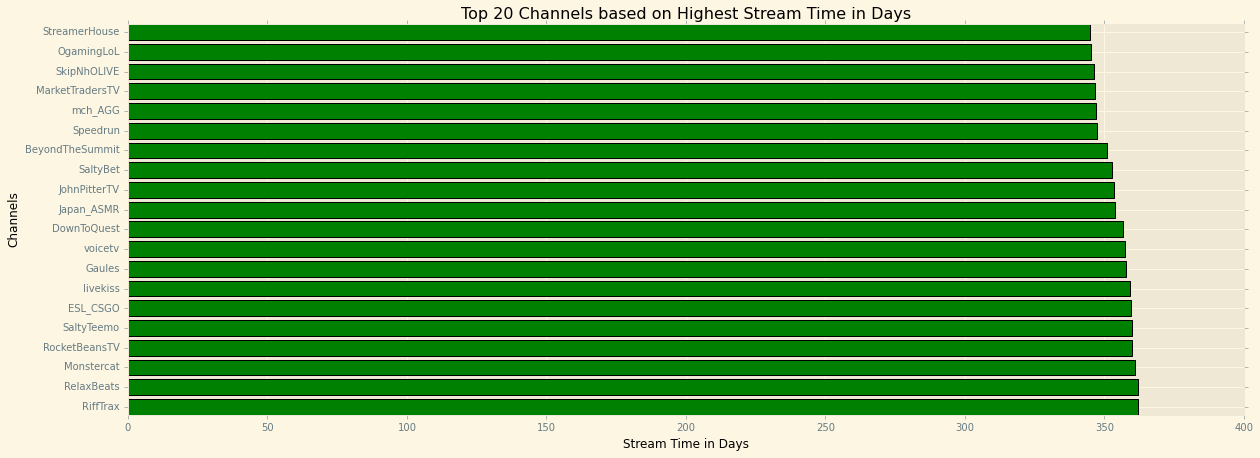

In [133]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,7))
plt.barh(most_stream['Channel'].head(20), most_stream['Stream Time(Days)'].head(20), color ='green')
plt.ylabel('Channels', color='Black')
plt.xlabel('Stream Time in Days', color='Black')
plt.title('Top 20 Channels based on Highest Stream Time in Days', color='Black')

The above graph shows that the Top 20 Channels with the Highest Stream time have streamed for more than 350 days out of 365 days in a year. This is due to the fact that some of these channels re-broadcast their streams when they are offline. Also, some channels have multiple people streaming on a single channel.
Special mentions :- 
- RiffTrax :- is an American company that involves roasting particular television films and programmes by comedians Michael J. Nelson, Kevin Murphy, Bill Corbett, and others.
- Streamerhouse :- A group of online friends hit Start Streaming the summer of 2013 and never thought to stop, now with over 45,000 hours broadcast to Twitch.
- ESL_CSGO - Home of all CS:GO broadcasts. Does a lot of RERUN of tournament matches.
- RelaxBeats - Stay live 24/7 playing relaxing music.
- Monstercat - A 24/7 music stream of non stop Monstercat music.

In [134]:
# Top 20 Channels with the Highest Peak Viewership
high_peak = df.sort_values(by=['Peak viewers'], ascending=False)
high_peak.head(20)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream Time(Days),Watch Time(Years)
12,Riot Games (riotgames),2674646715,80820,639375,20960,4487489,497678,56855694,True,False,English,56.125000,5088.749458
25,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish,38.093750,3343.620148
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English,4.385417,1936.030451
96,shroud,888505170,30240,471281,29612,7744066,833587,30621257,True,False,English,21.000000,1690.458847
109,dota2ti_ru,812538090,6195,457060,126232,541644,108438,12068376,True,False,Russian,4.302083,1545.924829
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,357.833333,10739.328225
53,csgomc_ru,1308967860,77955,364816,17020,492954,447601,42952835,True,False,Russian,54.135417,2490.425913
444,Warframe,262160025,13740,346131,12843,1254031,282680,5405191,True,False,English,9.541667,498.782392
73,StarLadder_cs_en,1088832810,32880,329195,29956,820675,260993,29821162,True,False,English,22.833333,2071.599715
431,JokerdTV,271815660,120165,319862,2013,159384,157656,9070954,True,True,English,83.447917,517.153082


Text(0.5, 1.0, 'Top 20 Channels based on Peak Viewership')

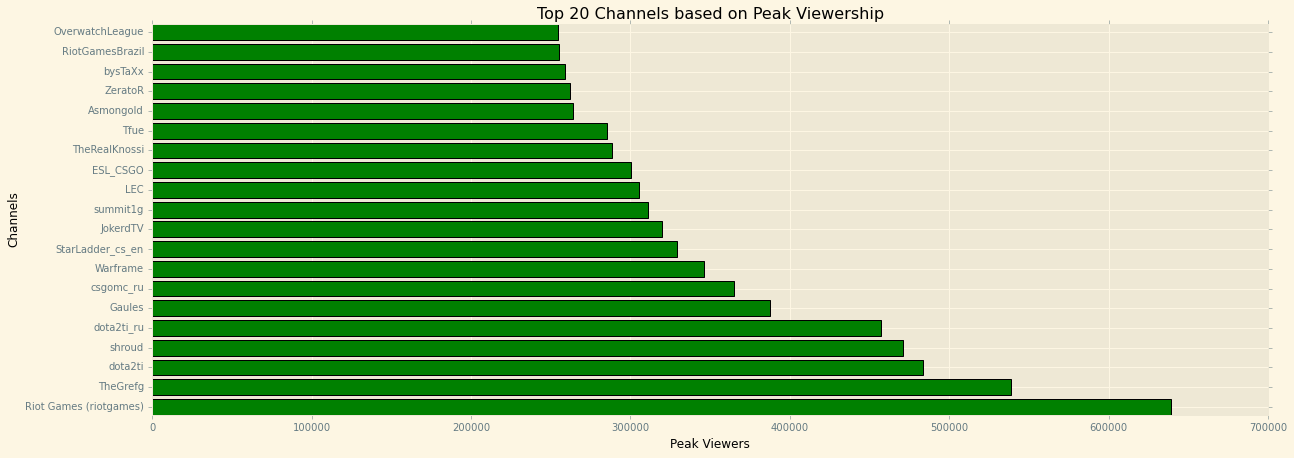

In [135]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,7))
plt.barh(high_peak['Channel'].head(20), high_peak['Peak viewers'].head(20), color ='green')
plt.xlabel('Peak Viewers', color='Black')
plt.ylabel('Channels', color='Black')
plt.title('Top 20 Channels based on Peak Viewership', color='black')

The above graph represents the Top 20 Channels that had the highest number of peak viewership in the year 2020. Some of these channels include official tournament organization channels. Moreover, some of the individual streamer channels also had their highest concurrent viewership in 2020 due to variety of different reasons.
- Riot Games :- Riot Games, Inc. is an American video game developer, publisher and esports tournament organizer. It has published games such as - League of Legends, Valorant. 
- dota2ti - Dota 2 is a multiplayer online battle arena video game developed and published by Valve.
- OverwatchLeague - The Overwatch League is a professional esports league for the video game Overwatch, produced by its developer Blizzard Entertainment.
- ESL_CSGO - Home of all CS:GO broadcasts.
- Shroud :- Returned to stream on Twitch following the shutdown of Mixer(another livestreaming platform owned by Microsoft).
- Tfue :- Rose in popularity thanks to Fortnite (battle-royale game developed by Epic Games).


In [136]:
# Top 20 Channels with the Highest Average Viewership
avg_channel = df.sort_values(by=['Average viewers'], ascending=False)
avg_channel.head(20)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream Time(Days),Watch Time(Years)
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English,4.385417,1936.030451
109,dota2ti_ru,812538090,6195,457060,126232,541644,108438,12068376,True,False,Russian,4.302083,1545.924829
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish,28.177083,4585.278824
41,LCS,1461310140,31125,214124,46459,1162746,526244,28313058,True,False,English,21.614583,2780.270434
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish,40.468750,4925.100143
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English,57.125000,6980.211330
21,LCK_Korea,1916365860,47325,140557,39848,619382,255088,76225485,True,False,Korean,32.864583,3646.053767
52,RocketLeague,1322448480,33540,206681,36086,1409120,412101,57189129,True,False,English,23.291667,2516.073973
46,LCK,1351758525,37140,171861,36030,934688,307853,28970100,True,False,English,25.791667,2571.838898
990,KEEMSTAR,123365895,3465,74195,35333,146035,46367,7139253,False,False,English,2.406250,234.714412


Text(0.5, 1.0, 'Top 20 Channels based on Average Viewership')

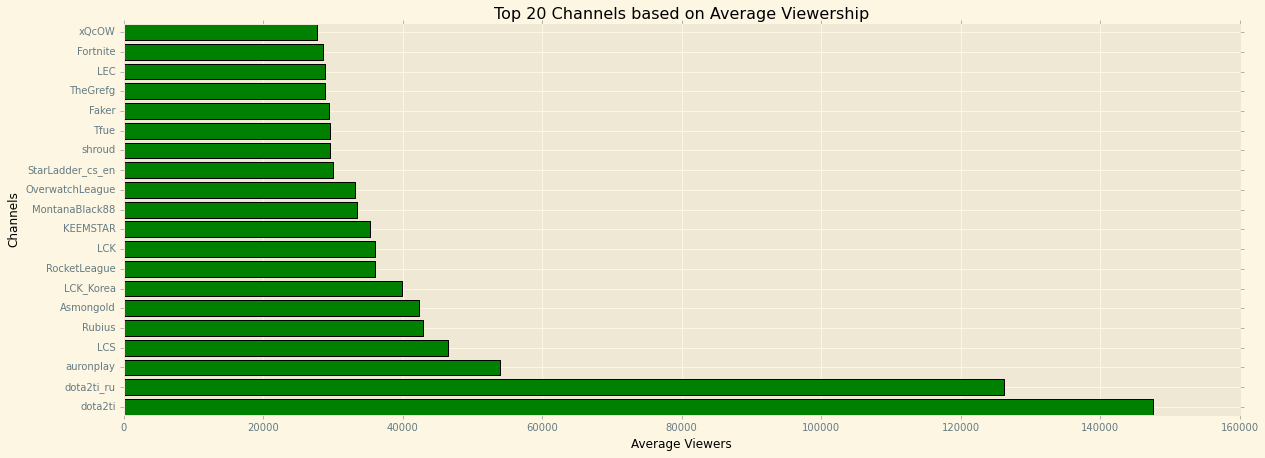

In [137]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,7))
plt.barh(avg_channel['Channel'].head(20), avg_channel['Average viewers'].head(20), color ='green')
plt.xlabel('Average Viewers', color='Black')
plt.ylabel('Channels', color='Black')
plt.title('Top 20 Channels based on Average Viewership', color='Black')

The graph above depicts the Top 20 channels which had the highest average viewership in the year 2020. Again, we can see that some of the channels with the highest average viewers consist of official tournament organizations, however there are some notable exceptions. 
- dota2ti :- The International is an annual Esports World Championship Tournament consisting of 18 teams for the video game Dota 2, hosted and produced by the game’s developer, Valve Corporation. It has a prize pool of a whopping 1 million USD.
- Asmongold :- Zack, better known as Asmongold, is an American Twitch streamer and YouTuber, primarily known for playing World of Warcraft. One of the co-founders of 'One True King', a group of online content creators. 
- Faker :- Lee Sang-hyeok, better known as Faker, is a South Korean professional League of Legends player for T1. He is considered one of the best, if not the best, League of Legends player. 
- MontanaBlack88 :- MontanaBlack88 'Marcel Eris' is a German variety streamer. He became the most subscribed channel on Twitch in September 2019.
- Rubius :- Rubén Doblas Gundersen is a Spanish-Norwegian YouTuber whose channel primarily consists of gameplays and vlogs. He has the most subscribers in Spain on YouTube.

In [138]:
# Top 20 Channels with the Most Followers 
most_followed = df.sort_values(by=['Followers'], ascending=False)
most_followed.head(20)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream Time(Days),Watch Time(Years)
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,85.875000,6984.398916
96,shroud,888505170,30240,471281,29612,7744066,833587,30621257,True,False,English,21.000000,1690.458847
35,Myth,1479214575,134760,122552,9396,6726893,1421811,37384058,True,False,English,93.583333,2814.335188
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish,40.468750,4925.100143
90,pokimane,964334055,56505,112160,16026,5367605,2085831,45579002,True,False,English,39.239583,1834.729937
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,147.114583,11589.949201
10,TimTheTatman,2834436990,108780,142067,25664,5265659,1244341,50119786,True,True,English,75.541667,5392.764441
87,dakotaz,978947160,132615,43397,7112,4520305,489250,18504106,True,False,English,92.093750,1862.532648
12,Riot Games (riotgames),2674646715,80820,639375,20960,4487489,497678,56855694,True,False,English,56.125000,5088.749458
23,DrDisrespect,1839882465,73065,97540,23794,4450718,825004,43919410,True,False,English,50.739583,3500.537414


Text(0.5, 1.0, 'Most Followed Top 20 Channels')

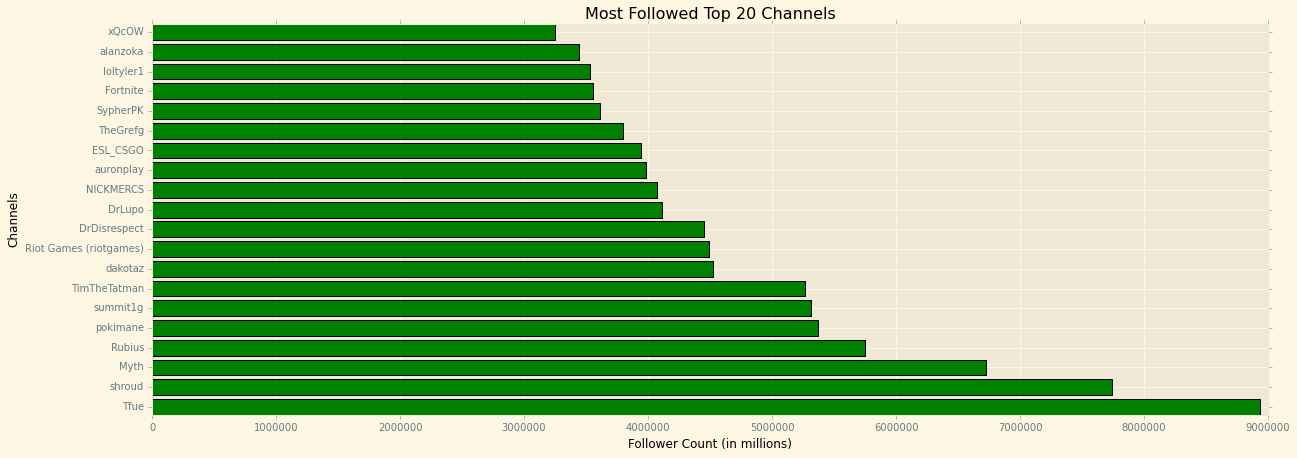

In [139]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,7))
plt.barh(most_followed['Channel'].head(20), most_followed['Followers'].head(20), color ='green')
plt.xlabel('Follower Count (in millions)', color='Black')
plt.ylabel('Channels', color='Black')
plt.title('Most Followed Top 20 Channels', color='black')

The above graph shows the channels with the most number of followers on Twitch for the year 2020. Here we see that most of the channels cosists of individual streamers instead of official organization channels leading us to believe that users typically watch the tournaments, but don't end up following the respective channel. Special mentions :- 
- Tfue :- Turner Tenney, also known by his online alias Tfue is an American streamer and esports player best known for playing Fortnite. Tenney previously streamed games such as Call of Duty, Destiny, and H1Z1, but he transitioned to Fortnite Battle Royale as it quickly gained popularity. 
- Myth :- Ali Kabbani, better known as Myth, is an American Twitch streamer and former professional Fortnite Battle Royale player.

In [140]:
# Top 20 Channels with the Highest Growth
most_followers = df.sort_values(by=['Followers gained'], ascending=False)
most_followers.head(20)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream Time(Days),Watch Time(Years)
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish,28.177083,4585.278824
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish,40.468750,4925.100143
25,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish,38.093750,3343.620148
51,Bugha,1324519320,100470,66311,12982,2942212,2220765,49441744,True,False,English,69.770833,2520.013927
90,pokimane,964334055,56505,112160,16026,5367605,2085831,45579002,True,False,English,39.239583,1834.729937
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,85.875000,6984.398916
40,Fresh,1464179820,147660,57431,9728,3135667,1875187,25341820,True,False,English,102.541667,2785.730251
669,SLAKUN10,179262330,9555,48358,18906,1874932,1874846,5835029,True,False,Spanish,6.635417,341.062272
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,149.479167,11788.740011
54,Clix,1256647110,89760,81926,12996,2035180,1687923,33286370,True,False,English,62.333333,2390.881107


Text(0.5, 1.0, 'Top 20 Channels with the Highest Growth')

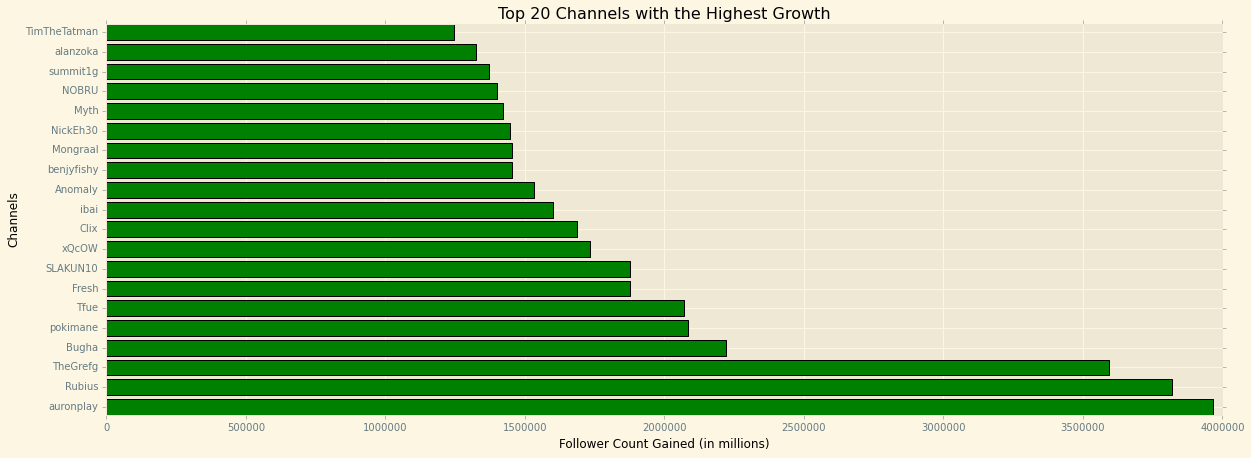

In [141]:
plt.figure(figsize=(20,7))
plt.barh(most_followers['Channel'].head(20), most_followers['Followers gained'].head(20), color ='green')
plt.xlabel('Follower Count Gained (in millions)', color='Black')
plt.ylabel('Channels', color='Black')
plt.title('Top 20 Channels with the Highest Growth', color='black')

The graph above represents the channels that have gained the highest number of new followers on Twitch in the year 2020. 
- auronplay :- auronplay is one of Spain’s most popular solo streamers of Minecraft.
- Rubius :- Another spanish streamer and YouTuber.
- TheGrefg :- Also a spanish streamer and YouTuber. 
- Bugha :- Kyle Giersdorf, better known as Bugha, is an American professional gamer in esports who is best known for playing Fortnite Battle Royale. He came to fame after winning the 2019 Fortnite World Cup.

Top 3 channels that gained the most number of new followers were from the Spanish community on Twitch. 

In [142]:
# Top 20 Channels that have gained the most views 
most_views = df.sort_values(by=['Views gained'], ascending=False)
most_views.head(20)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Stream Time(Days),Watch Time(Years)
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English,102.697917,6282.091866
703,Igromania,172086390,186960,6159,939,184078,13710,115312954,True,False,Russian,129.833333,327.409418
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,359.541667,7553.877740
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,357.833333,10739.328225
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,149.479167,11788.740011
399,HGmony,290461620,111360,21999,2465,34358,32326,90310969,False,False,Russian,77.333333,552.628653
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,147.114583,11589.949201
994,Destructoid,122628630,103020,14566,1190,48007,8995,87603521,True,False,English,71.541667,233.311701
205,Chess,521511525,96315,83666,5767,326118,181232,84500786,True,False,English,66.885417,992.221318
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,85.875000,6984.398916


Text(0.5, 1.0, 'Top 20 Channels with the Most views')

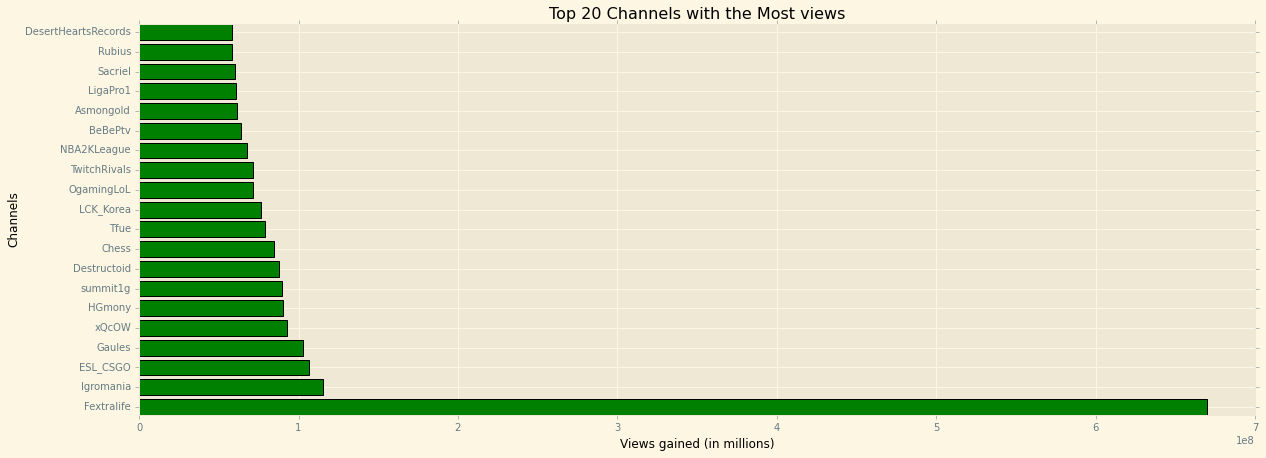

In [143]:
plt.figure(figsize=(20,7))
plt.barh(most_views['Channel'].head(20), most_views['Views gained'].head(20), color ='green')
plt.xlabel('Views gained (in millions)', color='Black')
plt.ylabel('Channels', color='Black')
plt.title('Top 20 Channels with the Most views', color='black')

The graph above depicts the channels that got most number of unique views in the year 2020. There is a difference between the views and concurrent viewership, as on Twitch views mean that the number of times a unique viewer watched your livestream. 
- The Fextralife controversy :- Fextralife is a gaming community and news source with a focus on Action, Adventure, and RPGs. Fextralife having so many viewers, claiming they are “stealing views” with embedded streams on their game wikis. On every page of the communities wiki, there is an embed of their channel in the top left corner. For those of you that dont know what an embed stream is, it is the principle of adding a small twitch player somewhere in a non-twitch page that will automaticaly play the stream while the visitor if browing the webiste and count as 1 viewer for the streamer.

## One of the key metrics for ranking channels on Twitch is Watch Time.

Text(0.5, 1.0, 'Top 50 Channels according to Watchtime')

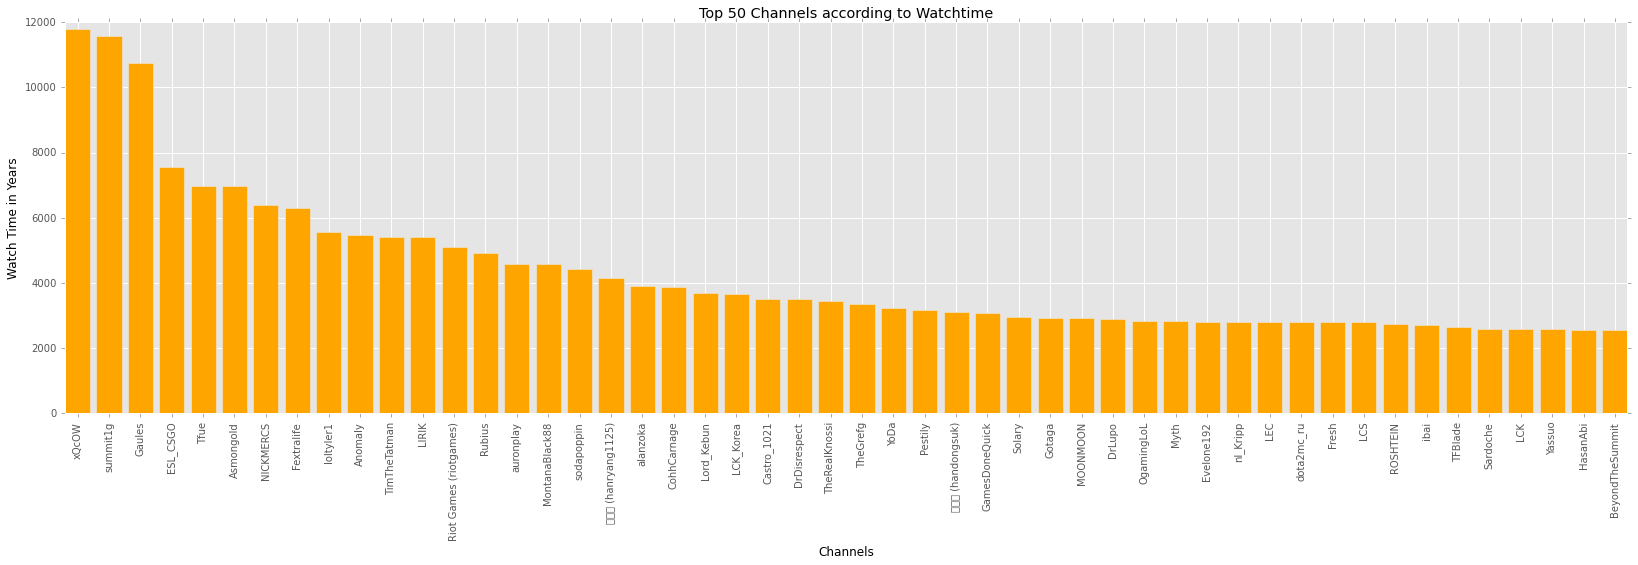

In [144]:
# Top 50 Channels based on Watch Time of every unique viewer
plt.style.use('ggplot')
plt.figure(figsize=(28,7))
plt.bar(df['Channel'].head(50), df['Watch Time(Years)'].head(50), color ='orange')
plt.xlabel('Channels', color='Black')
plt.ylabel('Watch Time in Years', color='Black')
plt.xticks(rotation='vertical')
plt.title('Top 50 Channels according to Watchtime', color='Black')

The above graph shows the Top 50 channels with the highest Watchtime. Watchtime is calculated by adding together the time spent by a every single unique viewer on a channel over the period of 1 year.  
- xQcOW :- Félix Lengyel, better known by his online alias as xQc or xQcOW, is a French-Canadian streamer, popular internet personality, and a former Overwatch professional player representing Dallas Fuel and Team Canada in various events. He is currently the most popular streamer on Twitch in 2022. 
- summit1g :- Jaryd Russell Lazar, better known as summit1g, is an American Twitch streamer and former professional Counter-Strike: Global Offensive player.
- Gaules :- Gaules, a former professional Counter-Strike player and coach turned content creator, is one of the most successful streamers in Brazil, as well as the whole world. He broadcasts some of the most important CS:GO and VALORANT international tournaments and also streams a variety of games.

Text(0.5, 1.0, 'Stream Time(Days) for Top 50 Channels')

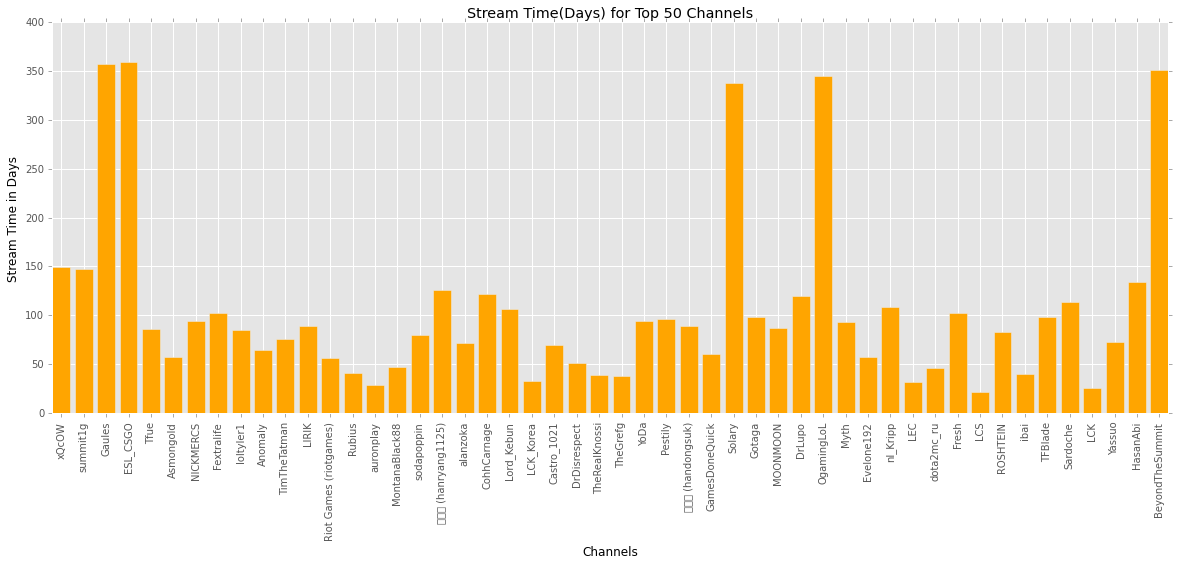

In [145]:
# Stream Time in Days for the Top 50 Channels based on Watch Time
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
plt.bar(df['Channel'].head(50), df['Stream Time(Days)'].head(50), color ='orange')
plt.xlabel('Channels', color='Black')
plt.ylabel('Stream Time in Days', color='Black')
plt.xticks(rotation='vertical')
plt.title('Stream Time(Days) for Top 50 Channels', color='Black')


The above graph represents Stream Time in Days for the Top 50 channels based on Watchtime. What this graph tells us is that a channel doesn't have to stream 24/7 to have a really high Watch time. Some of the channels streamed relatively less compared to the others yet are in this list becuase they had high average viewers. 

Text(0.5, 1.0, 'Peak viewership of Top 50 Channels')

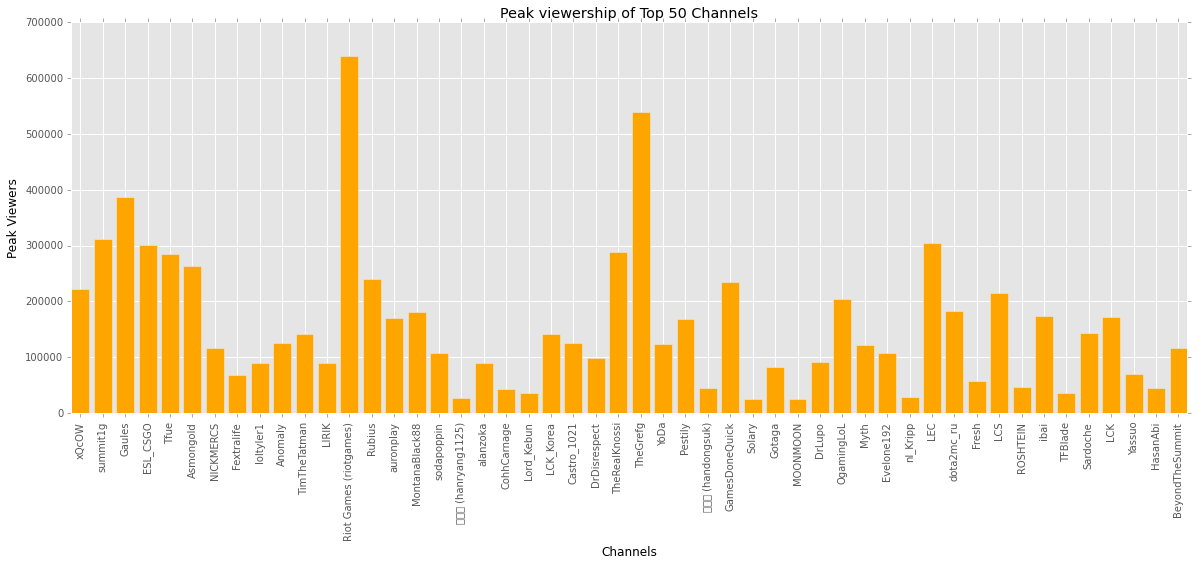

In [146]:
# Peak Viewership for the Top 50 Channels based on Watch Time
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
plt.bar(df['Channel'].head(50), df['Peak viewers'].head(50), color ='orange')
plt.xlabel('Channels', color='Black')
plt.ylabel('Peak Viewers', color='Black')
plt.xticks(rotation='vertical')
plt.title('Peak viewership of Top 50 Channels', color='black')


Text(0.5, 1.0, 'Average viewership of Top 50 Channels')

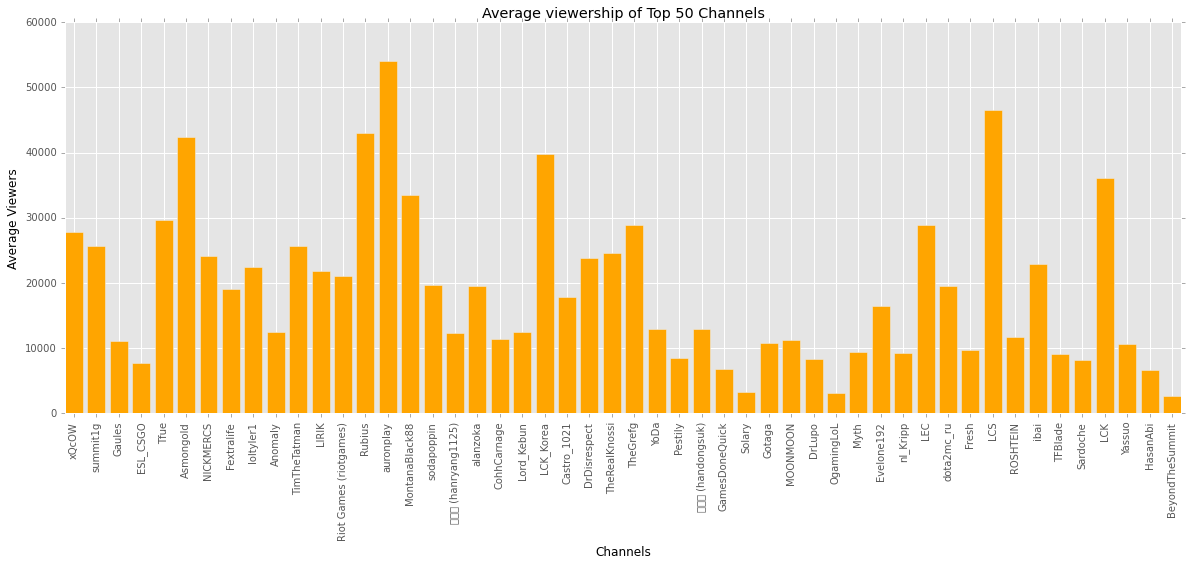

In [147]:
# Average Viewership for the Top 50 Channels based on Watch Time
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
plt.bar(df['Channel'].head(50), df['Average viewers'].head(50), color ='orange')
plt.xlabel('Channels', color='Black')
plt.ylabel('Average Viewers', color='Black')
plt.xticks(rotation='vertical')
plt.title('Average viewership of Top 50 Channels', color='Black')

Text(0.5, 1.0, 'Follower Count of Top 50 Channels')

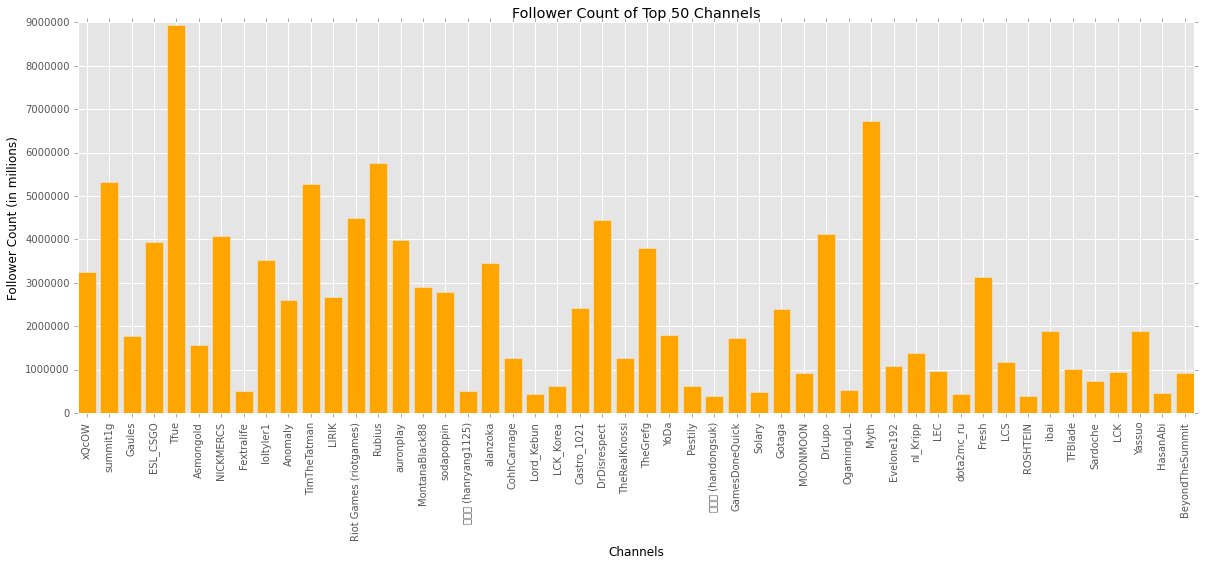

In [148]:
# Follower Count of the Top 50 Channels based on Watch Time
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
plt.bar(df['Channel'].head(50), df['Followers'].head(50), color ='orange')
plt.xlabel('Channels', color='Black')
plt.ylabel('Follower Count (in millions)', color='Black')
plt.xticks(rotation='vertical')
plt.title('Follower Count of Top 50 Channels', color='Black')

In [149]:
# Calculating which Channels have the highest watch time compared to their stream time
df['Popularity'] = df['Watch time(Minutes)']/df['Stream time(minutes)']
most_popular = df.sort_values(by=['Popularity'], ascending=False)

Text(0.5, 1.0, 'Top 20 Most Popular Channels')

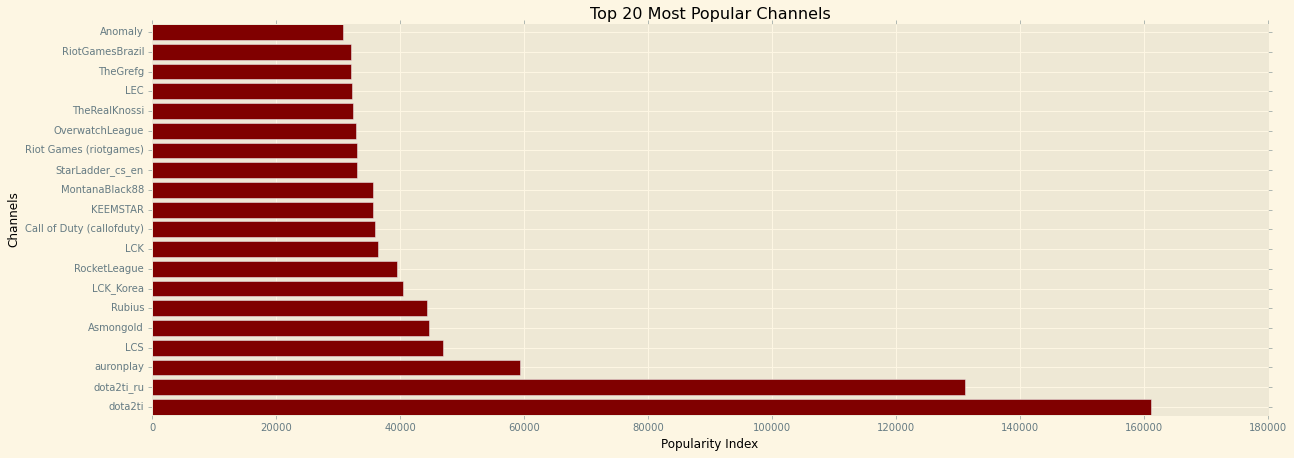

In [150]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,7))
plt.barh(most_popular['Channel'].head(20), most_popular['Popularity'].head(20), color ='maroon')
plt.xlabel('Popularity Index', color='Black')
plt.ylabel('Channels', color='Black')
plt.title('Top 20 Most Popular Channels', color='black')

- The above graph shows the channels which had the highest Watch Time compared to their Stream Time. Therefore, all the channels in this list had high watch time, but less stream time relatively to other channels. So, We can believe that all of these channels had high average concurrent viewership when the channel was live.

In [151]:
# Grouping charaacteristics of different languages and sorting it by Average Viewers
df_language = df[['Stream Time(Days)','Peak viewers','Average viewers','Followers','Language']]\
            .groupby(by = 'Language', as_index = False)\
            .mean()\
            .round(2)
df_language

,Language,Stream Time(Days),Peak viewers,Average viewers,Followers
0,Arabic,34.68,58281.40,5682.20,816537.60
1,Chinese,104.56,13104.37,3424.80,201714.53
2,Czech,97.77,9918.50,1827.67,247374.83
3,English,86.45,41639.72,5112.81,705685.65
4,Finnish,145.57,9676.00,1027.00,255595.00
5,French,91.54,33865.41,3506.53,439734.56
6,German,80.81,31274.73,4278.18,479367.57
7,Greek,85.66,6289.00,1961.00,82289.00
8,Hungarian,77.66,24780.00,2140.50,347856.50
9,Italian,85.51,17425.12,2205.53,328961.88


- The above tables shows the Language wise average statistics. The calculation is done by adding together all the values of different channels in their respective language for each measure / Total no of channels in the specific language.  

In [152]:
Top_Streamers_lang1 = df.groupby('Language').agg({'Watch Time(Years)': ['mean', 'min', 'max']})
Top_Streamers_lang1

Watch Time(Years)                          
                        mean         min           max
Language                                              
Arabic            454.814361  266.685987    762.244578
Chinese           644.893419  245.297003   1545.590040
Czech             546.222118  269.075656   1483.766039
English           897.868339  232.707506  11788.740011
Finnish           410.439326  410.439326    410.439326
French            719.319663  232.482591   2942.536872
German            749.545233  236.069635   4582.307820
Greek             438.647175  438.647175    438.647175
Hungarian         441.836687  392.783362    490.890011
Italian           479.640537  246.513756   1372.809903
Japanese          796.532934  264.337272   2152.795634
Korean            686.770193  232.976256   4160.316724
Other             568.546747  568.546747    568.546747
Polish            682.050404  256.682477   1364.338527
Portuguese        860.898585  236.263556  10739.328225
Russian           715.799955  237.466210   2805.826142
Slovak            578.809361  578.809361    578.809361
Spanish           715.743500  233.113841   4925.100143
Swedish           250.421946  250.421946    250.421946
Thai              467.387617  270.347888   1042.696775
Turkish           541.686064  241.066324   1382.000542

In [153]:
# Top streamers across different languages based on Watch Time
Top_Streamers_lang = df[['Channel','Language', 'Watch Time(Years)']].groupby('Language', as_index=False).max()
Top_Streamers_lang

,Language,Channel,Watch Time(Years)
0,Arabic,shongxbong,762.244578
1,Chinese,龜狗 (gueigotv),1545.590040
2,Czech,Xnapycz,1483.766039
3,English,xQcOW,11788.740011
4,Finnish,OfficialAndyPyro,410.439326
5,French,rhobalas_lol,2942.536872
6,German,xTheSolutionTV,4582.307820
7,Greek,Pun1shers_TV,438.647175
8,Hungarian,WeAreTheVR,490.890011
9,Italian,veloxey,1372.809903


In [154]:
language_list = df['Language'].values

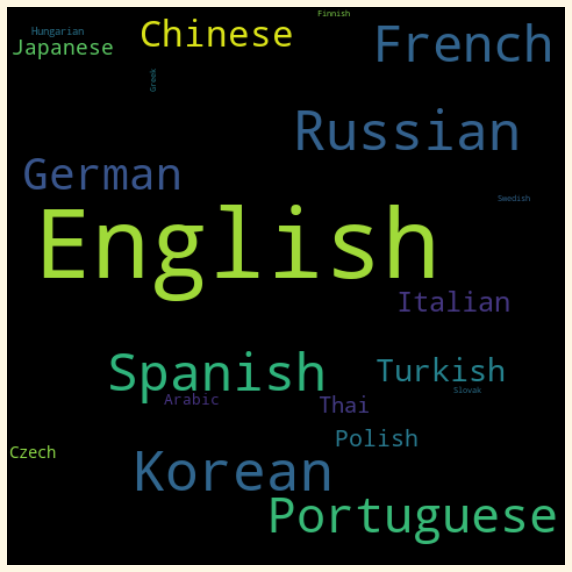

In [155]:
# Generating word clouds

text = ""
for word in language_list:
    text = text + " " + word
    
wordcloud = WordCloud(width=480, height=480).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)


Here we can see that some of the most popular languages in which the streamers stream are English, Russian, Spanish, German, Korean, Portuguese

In [156]:
# Top 20 Channels with the Mature Stream Tag
df[df['Mature'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)','Peak viewers','Followers']].head(20)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Followers
2,Gaules,5644590915,515280,387315,1767635
10,TimTheTatman,2834436990,108780,142067,5265659
15,MontanaBlack88,2408460990,67740,181600,2911316
16,sodapoppin,2329440420,115305,107833,2786162
24,TheRealKnossi,1811696100,56010,288459,1260160
32,MOONMOON,1527882945,124680,24892,923448
42,ROSHTEIN,1435735725,118995,45843,381918
45,Sardoche,1361024835,164235,144066,746865
55,Gorgc,1252711830,141135,56449,391726
63,Quin69,1186941750,174270,36742,538532


The table above shows the Top 20 Channels that had the Mature tag on their streams. 
- Mature Tag :- It is for those channels whose stream content may be inappropriate for younger audience. This doesn't mean sexual content or violence activity. Example :- Gambling content or abusive language.


Text(0.5, 1.0, 'Percentage of Languages')

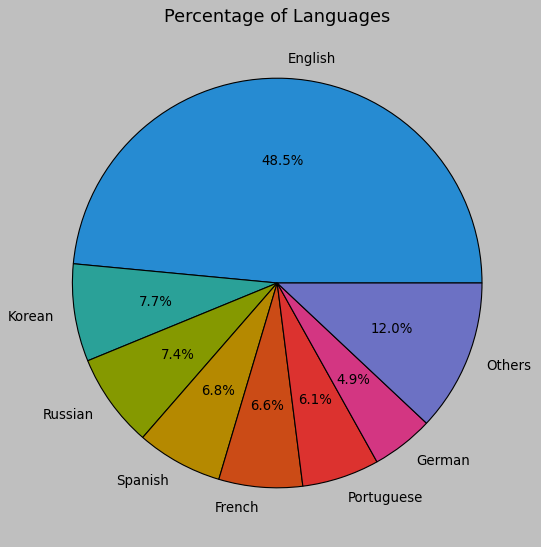

In [179]:
# Breakup of Top 10 Languages
language = df['Language'].value_counts()
lang_others = language[7:].sum()
lang2 = language[:7]
lang2['Others'] = 120
plt.figure(figsize=(25,8))
plt.style.use('Solarize_Light2')
plt.pie(lang2, labels=lang2.index, autopct='%1.1f%%')
plt.title('Percentage of Languages')

The above Pie Chart illustrates the breakdown of different languages across the Top 1000 channels.
- English language is spoken on almost half of the channels. 
- Korea, Russian, Spanish, French and Portuguese have an approximately similar share.
- The popularity of Spanish has been significantly contributed to by auronplay & rubius, as seen before.

Text(0.5, 1.0, 'Percentage of Partnership')

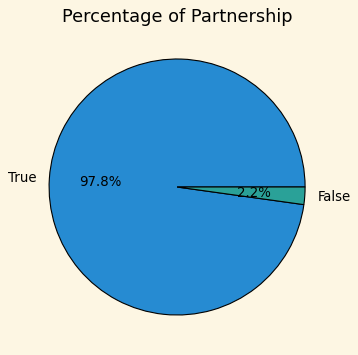

In [177]:
partnered = df['Partnered'].value_counts()
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,5))
plt.pie(partnered, labels=partnered.index, autopct='%1.1f%%')
plt.title('Percentage of Partnership')


The above Pie chart depicts the breakdown of Partnered channels in the Top 1000 channels.
- 97.8% of the channels in the Top 1000 are Partnered whereas 2.2% aren't.
- The Twitch Partnership Program is for those who are committed to streaming and are ready to level up from Affiliate.
- Channel Subscriptions & emotes. (Tier 1,2 & 3 subscription additionally 50 channel emotes)
- Bits (virtual goods viewers can buy and cheer on a channel)
- Ads (Partners earn a share of revenue generated from any ads on their channel)

Text(0.5, 0, 'Watch Time in Years')

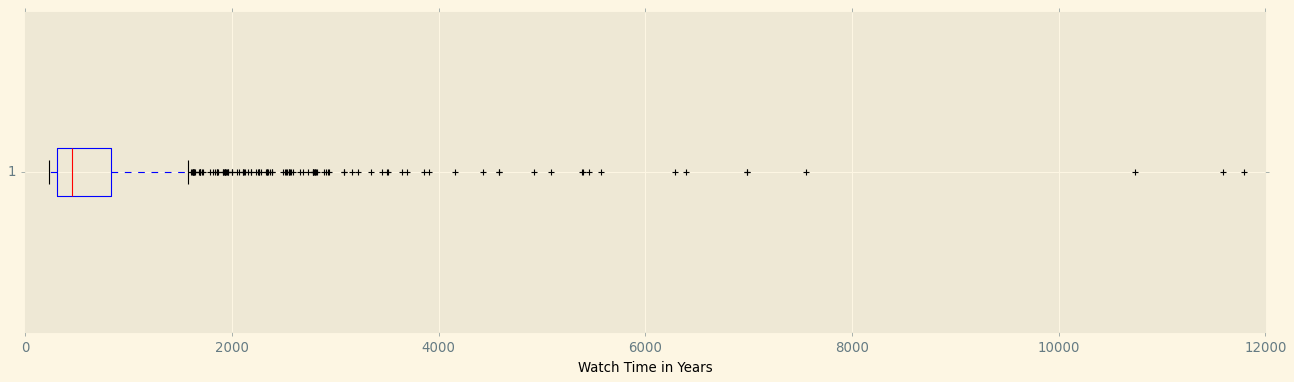

In [185]:
df2 = df[['Watch Time(Years)','Stream Time(Days)','Average viewers','Peak viewers','Followers']]
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,5))
plt.boxplot(df2['Watch Time(Years)'], vert=False)
plt.xlabel('Watch Time in Years', color='Black')

The above box plot has so many outliers because most of the top channels are very popular.
    The median value is 447.09 and IQR is 514.74

Text(0.5, 0, 'Stream Time in Days')

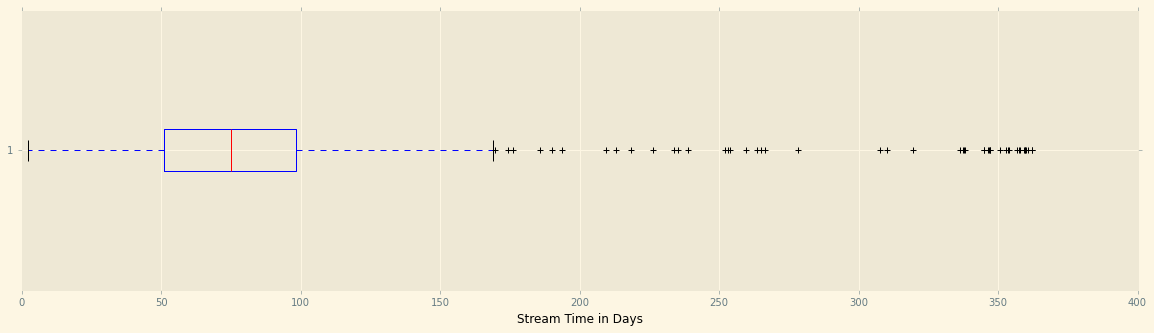

In [168]:
plt.figure(figsize=(20,5))
plt.style.use('Solarize_Light2')
plt.boxplot(df2['Stream Time(Days)'], vert=False)
plt.xlabel('Stream Time in Days', color='Black')

The median value is 75.16 and IQR is 47.28

Text(0.5, 0, 'Average viewers')

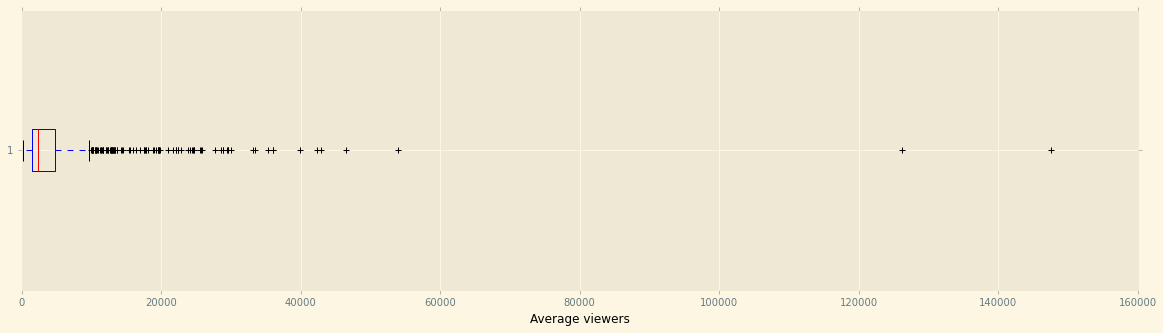

In [165]:
plt.figure(figsize=(20,5))
plt.style.use('Solarize_Light2')
plt.boxplot(df2['Average viewers'], vert=False)
plt.xlabel('Average viewers', color='Black')

The median value is 2425 and IQR is 3328.5

Text(0.5, 0, 'Peak viewership')

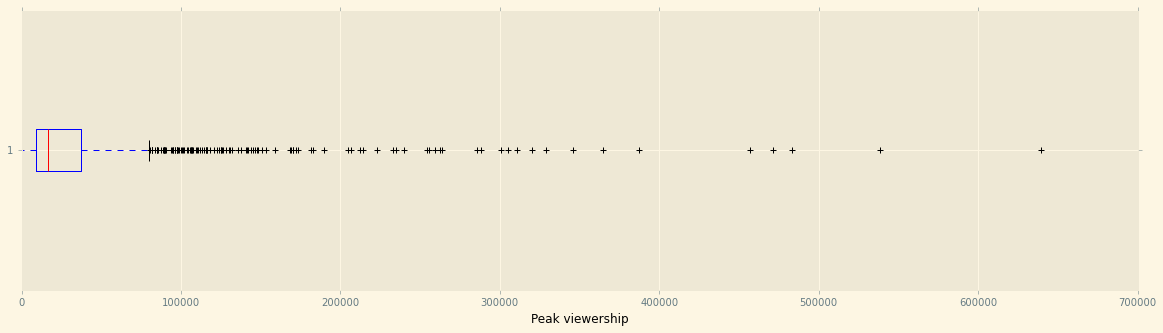

In [164]:
plt.figure(figsize=(20,5))
plt.style.use('Solarize_Light2')
plt.boxplot(df2['Peak viewers'], vert=False)
plt.xlabel('Peak viewership', color='Black')

The median value is 16676 and IQR is 28456

Text(0.5, 0, 'Follower Count(in millions)')

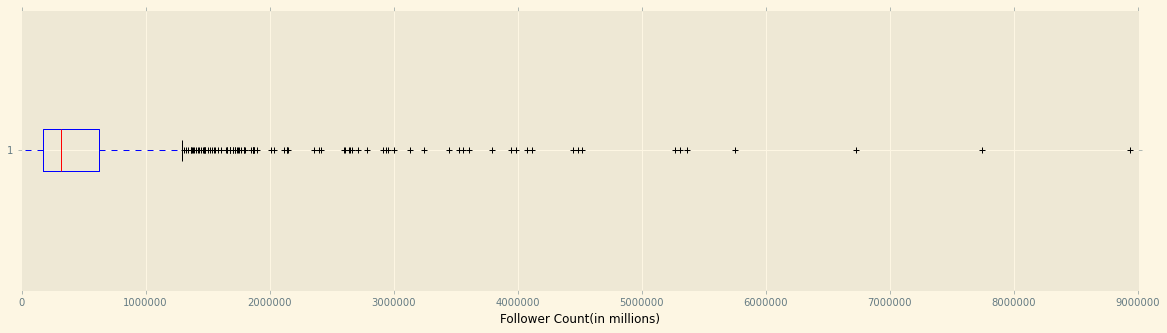

In [167]:
plt.figure(figsize=(20,5))
plt.style.use('Solarize_Light2')
plt.boxplot(df2['Followers'], vert=False)
plt.xlabel('Follower Count(in millions)', color='Black')

The median value is 318063 and IQR is 453786